In [20]:
import sys
import mysql.connector
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
import tweepy
import json
import networkx as nx
import matplotlib.pyplot as plt

In [21]:
dbusername="root"
dbpassword = "Fisherm@n82"
dbhost = "localhost"
dbdatabase = "Mysql"

try:
    dropsql = "DROP TABLE IF EXISTS `Tdata`"
    createsql = "CREATE TABLE `Tdata`( `screen_name` VARCHAR(255) NOT NULL , `user_name` VARCHAR(255) NOT NULL , `user_location` VARCHAR(255) NOT NULL , `user_description` VARCHAR(255) NOT NULL , `no_follows` INT(10) NOT NULL , `no_friends` INT(10) NOT NULL , `statuses` INT(10) NOT NULL , `user_url` VARCHAR(255) NULL )"
    connection = mysql.connector.connect(host=dbhost,user=dbusername, passwd=dbpassword, db=dbdatabase)
    cursor = connection.cursor()
    cursor.execute(dropsql)
    cursor.execute(createsql)
    connection.commit()
    cursor.close()
except mysql.connector.Error as error:
    print("Failed to save into database {}".format(error))
    
finally:
    if (connection.is_connected()):
        connection.close()

In [22]:
ACCESS_KEY = '1144377060036620294-BSEicX3zH7hIhksbNZV9mrWFwa07cO'
ACCESS_SECRET = 'gxWMOodDq1nQAjix9mHEOUSAtgE7XH5ctHInm0XRslJce'
CONSUMER_KEY = 'u7L1lnR7HN85dn1qnTFO1cegb'
CONSUMER_SECRET = 'QN1JrEmit2To46ZcwWAT4aI5QGWZXWRDDUPnMCWV5M66SFc8wT'

In [23]:
class ListenToTweets(StreamListener):
    count_tweets = 0
    def __init__(self,tweets,limit):
        self.tweets = tweets
        self.limit = limit
        
    def on_data(self, data):
        self.count_tweets+=1 
        try:
            tweets = json.loads(data)
            with open(self.tweets,'a') as wr:
                json.dump(tweets, wr)
            return True
        except BaseException as ex:
            print('Error: %s' %str(ex))
            return False
        if self.count_tweets >= self.limit:
            return False
            
    def on_error(self,status):
        print(status)
        if status == 420:
            return False

In [24]:
auth = OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
myapi = tweepy.API(auth)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
myapi = tweepy.API(auth)

In [25]:
usersinfo = myapi.lookup_users(user_ids=['84554399','101311381','21447363','15846407','18681139','37046756','129307263','34507480','16409683','25365536'])
data_to_save =[]
for user in usersinfo:
    values = (user.screen_name,user.name,user.location,user.description,
                user.followers_count,user.friends_count,user.statuses_count,user.url)
    data_to_save.append(values)


try:
    sql = "INSERT INTO `Tdata` (`screen_name`, `user_name`, `user_location`, `user_description`, `no_follows`, `no_friends`, `statuses`, `user_url`) VALUES (%s,%s,%s,%s,%s,%s,%s,%s)"

    connection = mysql.connector.connect(host=dbhost,user=dbusername, passwd=dbpassword, db=dbdatabase)
    cursor = connection.cursor()
    cursor.executemany(sql,data_to_save)
    connection.commit()
    print("Successfully Saved")
    cursor.close()
except mysql.connector.Error as error:
    print("Failed to save into database {}".format(error))
    
finally:
    if (connection.is_connected()):
        connection.close()

Successfully Saved


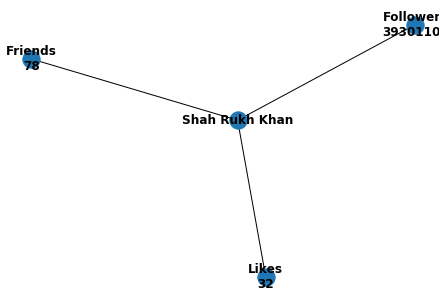

In [29]:
nodes = []
edges = []
usersinfo = myapi.lookup_users(user_ids=['101311381'])
for user in usersinfo:
    nodes.append(user.name)
    set_followers = (user.name,'Followers\n'+str(user.followers_count))
    set_friends = (user.name , 'Friends\n'+str(user.friends_count))
    favourites = (user.name, 'Likes\n'+str(user.favourites_count))
    
    edges.append(set_followers)
    edges.append(set_friends)
    edges.append(favourites)  
G = nx.Graph()
#  add nodes
G.add_nodes_from(nodes)
# add edges
G.add_edges_from(edges)
nx.draw(G, with_labels=True, font_weight='bold')

In [33]:
def authenticate(API_KEY, SECRET_KEY, ACCESS_KEY, ACCESS_SECRET):

    auth = OAuthHandler(API_KEY, SECRET_KEY)
    auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
    api = API(auth, 
                     wait_on_rate_limit=True, 
                     wait_on_rate_limit_notify=True)
  
    return api

In [9]:
keyword = ['Texas','weather']
geolocation = [-86.33,41.63,-86.20,41.74] 

api = authenticate(CONSUMER_KEY,CONSUMER_SECRET,ACCESS_KEY,ACCESS_SECRET)


class Listener(StreamListener):
    
    def __init__(self,output_data=sys.stdout):
        self.num_tweets = 0
        super(Listener, self).__init__()  
        self.output_data = output_data
    
    def on_status(self, status):        
        if self.num_tweets < 100:
            print(status.text,file=self.output_data)
            self.num_tweets += 1
            return True
        else:
            return False

In [10]:
file = 'texas_weather.json';
output = open(file, 'a',encoding="utf-8")
lstn = Listener(output_data=output)
stream = Stream(auth=api.auth, listener=lstn)

try:    
    stream.filter(track=keyword)
finally:
        output.close()

In [11]:
file = 'geolocation_file.json';
output = open(file, 'a',encoding="utf-8")
lstn_2 = Listener(output_data=output)
stream = Stream(auth=api.auth, listener=lstn_2)

try:    
    stream.filter(locations=geolocation)
finally:
    
    output.close()

In [15]:
with open("hashtag_unt.json", 'w') as file:     
    for tweet in api.search(q="#UNT", lang="en", rpp=100):
        json.dump(tweet.text, file, indent=4, sort_keys=True)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df=pd.read_csv("C:/assignment_4_property_tax_report_2019.csv",encoding = "utf-8",index_col=False)
df.head()

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,LOT,BLOCK,PLAN,DISTRICT_LOT,...,NARRATIVE_LEGAL_LINE5,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE
0,030-712-831,LAND,6.131190e+11,61311906,RM-5A,Multiple Family Dwelling,1,NaN,EPP87122,185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
1,003-614-468,STRATA,6.841650e+11,68416507,RM-3,Multiple Family Dwelling,30,NaN,VAS473,526,...,NaN,443000.0,48300.0,2019.0,386000.0,52100.0,1977.0,1977.0,1030.90,7
2,029-610-885,STRATA,6.401230e+11,64012298,C-2B,Commercial,20,NaN,EPS2945,526,...,OF THE STRATA LOT AS SHOWN ON FORM,729000.0,336000.0,2019.0,639000.0,338000.0,2015.0,2015.0,2727.63,7
3,030-764-386,STRATA,6.541920e+11,65419193,CD-1 (591),NaN,160,119,EPS5422,301,...,IT ENTITLEMENT OF THE STRATA LOT AS,148271.0,271638.0,2019.0,NaN,NaN,NaN,NaN,1055.99,13
4,030-764-637,STRATA,6.541920e+11,65419193,CD-1 (591),NaN,185,119,EPS5422,301,...,IT ENTITLEMENT OF THE STRATA LOT AS,239516.0,438801.0,2019.0,NaN,NaN,NaN,NaN,1705.82,13


In [15]:
dataset=df.loc[~pd.isnull(df.YEAR_BUILT)]
dataset = df[['ZONE_CATEGORY','YEAR_BUILT']][(df['YEAR_BUILT'] >=1900)]

dataset_new=dataset.groupby('YEAR_BUILT').count()

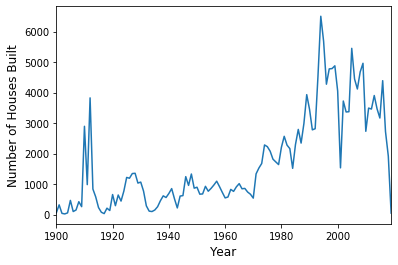

In [16]:
ax=dataset_new.plot()
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Houses Built", fontsize=12)
ax.get_legend().remove()


plt.show()


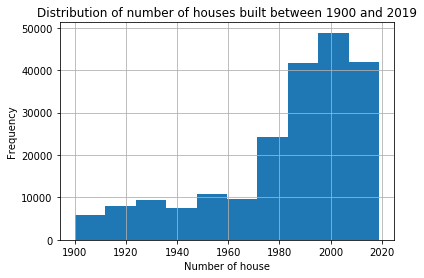

In [17]:
ax=dataset.hist()

plt.title('Distribution of number of houses built between 1900 and 2019')
plt.xlabel('Number of house')
plt.ylabel('Frequency')
plt.show()

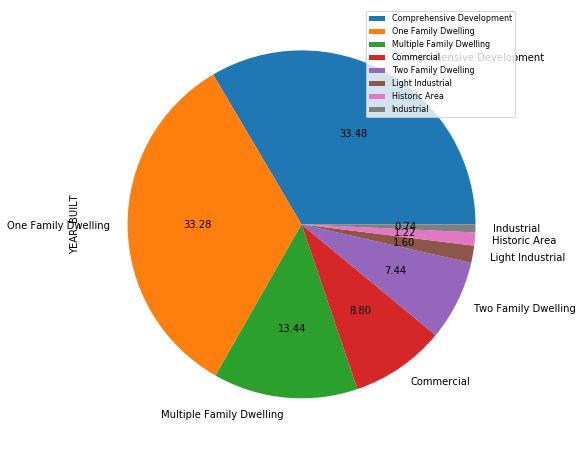

In [18]:
dataset_pie=dataset.groupby('ZONE_CATEGORY').count()


dataset_pie=dataset_pie.nlargest(8,'YEAR_BUILT')

dataset_pie.plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%.2f',fontsize=10)

plt.legend(loc=0, fontsize=8)


plt.show()

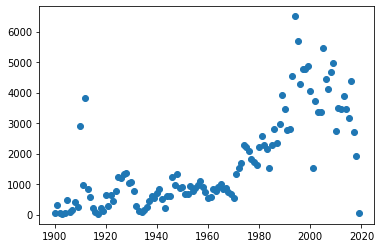

In [19]:
dataset_new=dataset.groupby('YEAR_BUILT').count()
dataset_new=dataset_new.reset_index()
plt.scatter(dataset_new.YEAR_BUILT,dataset_new.ZONE_CATEGORY)
plt.show()